In [ ]:
%matplotlib inline

from google.colab import files, drive    # upload
import numpy as np                       # mathematical calculations
from io import BytesIO                   # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library
from scipy import signal
import math
import plotly.express as px       # interactive plotting library
import cv2                        # function to read video,

In [ ]:
drive.mount('drive')
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Image Blending/landscape.jpeg")
im = np.array(img)
img2 = Image.open("/content/drive/MyDrive/Colab Notebooks/Image Blending/cell.png")
cell = np.array(img2)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
def convert_uint8(im):
  return np.uint8(255*im/im.max())

In [ ]:
def up_sample(im, dimensions):
  test_upsample = np.zeros(dimensions, dtype = np.float32)
  test_upsample[::2, ::2, :] = im

  if test_upsample.shape[0] % 2 == 0:
    height = test_upsample.shape[0] - 1
  else:
    height = test_upsample.shape[0]

  if test_upsample.shape[1] % 2 == 0:
    width = test_upsample.shape[1] - 1
  else:
    width = test_upsample.shape[1]



  for i in range(width):
    for z in range(height):
      if i%2 != 0 and z%2 != 0:
        average = test_upsample[z-1,i-1,:] + test_upsample[z-1,i+1,:] + test_upsample[z+1,i-1,:] + test_upsample[z+1,i+1,:]
        average = average/4
        test_upsample[z,i,:] = average
      elif i%2 != 0 and z%2 == 0:
        average = test_upsample[z,i-1,:] + test_upsample[z,i+1,:]
        average = average/2
        test_upsample[z,i,:] = average
      elif i%2 == 0 and z%2 != 0:
        average = test_upsample[z-1,i,:] + test_upsample[z+1,i,:]
        average = average/2
        test_upsample[z,i,:] = average

    if width < test_upsample.shape[1]:
      test_upsample[:,width,:] = test_upsample[:,width-1,:]

    if height < test_upsample.shape[0]:
      test_upsample[height,:,:] = test_upsample[height-1,:,:]


  return test_upsample

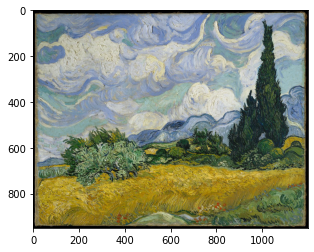

In [ ]:
plt.imshow(im)

(320, 320)


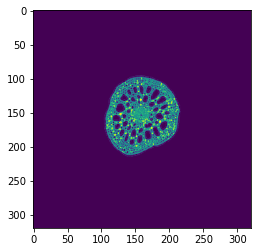

In [ ]:
plt.imshow(cell)
print(cell.shape)

In [ ]:
grey = 0.3*im[:,:,0] + 0.59*im[:,:,1] + 0.11*im[:,:,2]
grey = grey/grey.max()

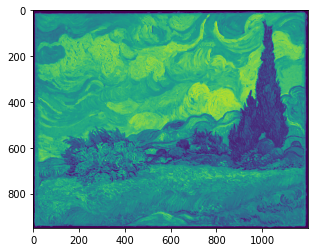

In [ ]:
plt.imshow(grey)

In [ ]:
n = 4
smooth_kern = np.ones((n,n))/(n*n)
result = signal.convolve2d(grey[:, :], smooth_kern, mode='same')

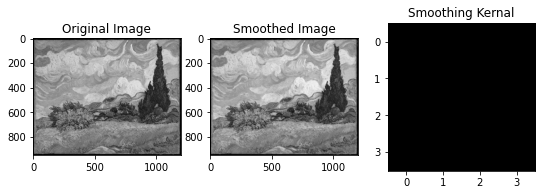

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[9, 4])
ax0.set_title("Original Image")
ax1.set_title("Smoothed Image")
ax2.set_title("Smoothing Kernal")

im0 = ax0.imshow(grey, cmap='gray')
im1 = ax1.imshow(result, cmap='gray')
im2 = ax2.imshow(smooth_kern, cmap='gray')

Make a box filter

<built-in method sum of numpy.ndarray object at 0x7f1eff0d9630>


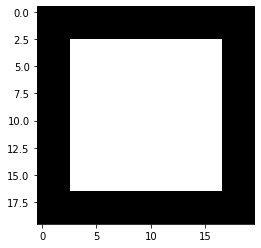

In [ ]:
b = 20
w = 15
mid = b//2
box_filter = np.zeros((b,b))/(n*n)
box_filter[mid-w//2:mid+w//2, mid-w//2:mid+w//2] = 1
box_filter = box_filter/(w*w)
plt.imshow(box_filter, cmap='gray')
print(box_filter.sum)

In [ ]:
boxresult = signal.convolve2d(cell, box_filter, mode='same')

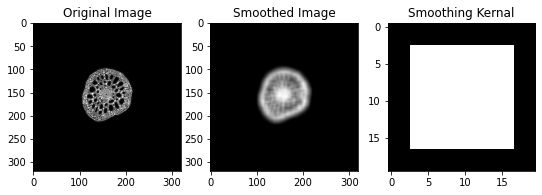

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[9, 4])
ax0.set_title("Original Image")
ax1.set_title("Smoothed Image")
ax2.set_title("Smoothing Kernal")

im0 = ax0.imshow(cell, cmap='gray')
im1 = ax1.imshow(boxresult, cmap='gray')
im2 = ax2.imshow(box_filter, cmap='gray')

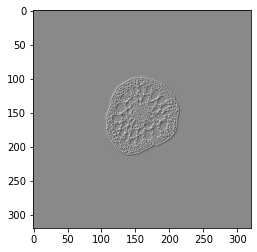

In [ ]:
difference = cell - boxresult
plt.imshow(difference, cmap='gray')

Double Box Filter

<built-in method sum of numpy.ndarray object at 0x7f1eff9fbf30>


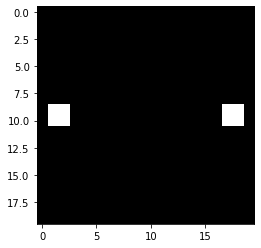

In [ ]:
d_b = 20
d_w = 2
d_s = 17
mid = d_b//2
d_box_filter = np.zeros((d_b,d_b))/(n*n)
d_box_filter[mid-d_w//2:mid+d_w//2, mid-d_w//2 - d_s//2:mid+d_w//2 - d_s//2] = 1
d_box_filter[mid-d_w//2:mid+d_w//2, mid-d_w//2 + d_s//2:mid+d_w//2 + d_s//2] = 1
d_box_filter = d_box_filter/(d_w*d_w)
plt.imshow(d_box_filter, cmap='gray')
print(d_box_filter.sum)

In [ ]:
doubleboxresult = signal.convolve2d(cell, d_box_filter, mode='same')

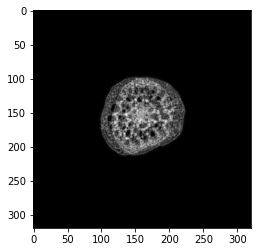

In [ ]:
plt.imshow(doubleboxresult, cmap='gray')

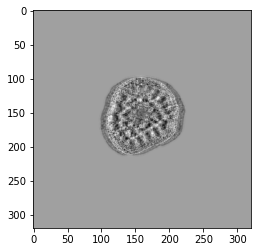

In [ ]:
difference = cell - doubleboxresult
plt.imshow(difference, cmap='gray')

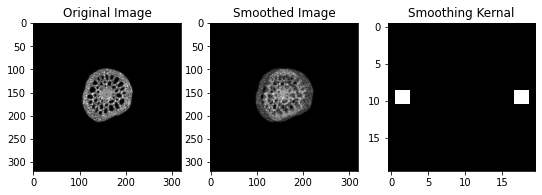

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[9, 4])
ax0.set_title("Original Image")
ax1.set_title("Smoothed Image")
ax2.set_title("Smoothing Kernal")

im0 = ax0.imshow(boxresult, cmap='gray')
im1 = ax1.imshow(doubleboxresult, cmap='gray')
im2 = ax2.imshow(d_box_filter, cmap='gray')

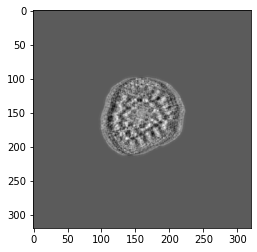

In [ ]:
difference = doubleboxresult - boxresult
plt.imshow(difference, cmap='gray')

Identity

In [179]:
identity = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]                     
])
identityresult = signal.convolve2d(cell, identity, mode='same')

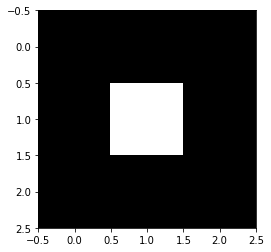

In [182]:
plt.imshow(identity, cmap='gray')

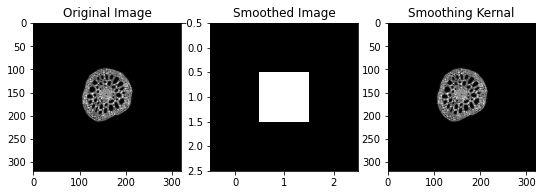

In [180]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[9, 4])
ax0.set_title("Original Image")
ax1.set_title("Smoothed Image")
ax2.set_title("Smoothing Kernal")

im0 = ax0.imshow(cell, cmap='gray')
im1 = ax1.imshow(identity, cmap='gray')
im2 = ax2.imshow(identityresult, cmap='gray')

Circle Filter

In [ ]:
def create_circular_mask(h, w, center=None, radius=None):
    """
    https://stackoverflow.com/questions/44865023/how-can-i-create-a-circular-mask-for-a-numpy-array
    """

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [ ]:
#https://stackoverflow.com/questions/44865023/how-can-i-create-a-circular-mask-for-a-numpy-array
h, w = (20, 20)
center = (int(h/2), int(w/2))
radius = 2
radius2 = radius+1
mask = create_circular_mask(h, w, center=center, radius=radius)
whiteblankimage = 1 * np.ones(shape=[h, w, 3], dtype=np.float32)

mask2 = create_circular_mask(h, w, center=center, radius=radius2)

circle_filter = whiteblankimage.copy()

circle_filter[~mask] = 0.5

circle_filter[~mask2] = 0

circle_filter = 0.3*circle_filter[:,:,0] + 0.59*circle_filter[:,:,1] + 0.11*circle_filter[:,:,2]

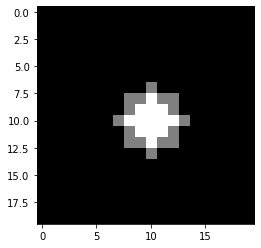

In [ ]:
plt.imshow(circle_filter, cmap='gray')

In [ ]:
circleresult = signal.convolve2d(grey[:, :], circle_filter, mode='same')

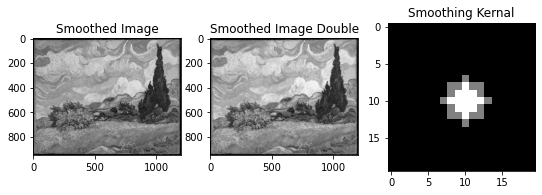

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[9, 4])
ax0.set_title("Smoothed Image")
ax1.set_title("Smoothed Image Double")
ax2.set_title("Smoothing Kernal")

im0 = ax0.imshow(grey, cmap='gray')
im1 = ax1.imshow(circleresult, cmap='gray')
im2 = ax2.imshow(circle_filter, cmap='gray')

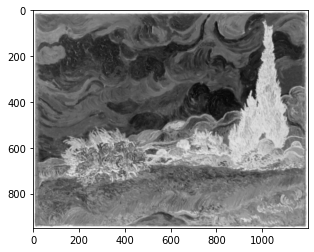

In [ ]:
difference = grey - circleresult
plt.imshow(difference, cmap='gray')

Anti-Alias Circle Filter

In [ ]:
# Make a circular mask
N = 20
kernel_size = N
kernel_radius = kernel_size//8
cen_x = 0
cen_y = 0

x, y = np.ogrid[-kernel_radius:kernel_radius, -kernel_radius:kernel_radius]
dist = (np.square(x-cen_y) + np.square(y-cen_x))**0.5 # shape (kernel_size, kernel_size)

rad = 2 # radius of circle

# let's create three kernels for the sake of example
radii = np.array([rad])#[...,None,None] # shape (num_radii, 1, 1)
circ_filter = 1 - (dist - radii).clip(0,1) # shape (num_radii, kernel_size, kernel_size)

circ_filter = circ_filter/circ_filter.sum()

circ_im = signal.convolve2d(grey, circ_filter, mode='same')

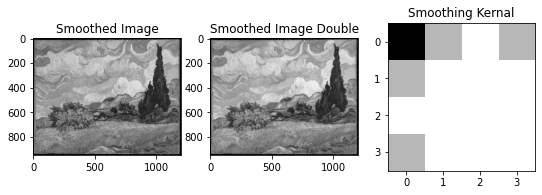

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[9, 4])
ax0.set_title("Smoothed Image")
ax1.set_title("Smoothed Image Double")
ax2.set_title("Smoothing Kernal")

im0 = ax0.imshow(grey, cmap='gray')
im1 = ax1.imshow(circ_im, cmap='gray')
im2 = ax2.imshow(circ_filter, cmap='gray')

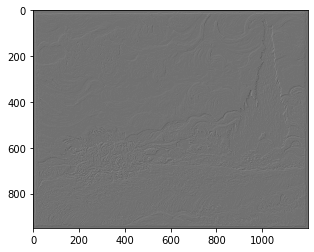

In [ ]:
difference = grey - circ_im
plt.imshow(difference, cmap='gray')

Interactive Plots

https://plotly.com/python-api-reference/generated/plotly.express.imshow.html


Two Squares


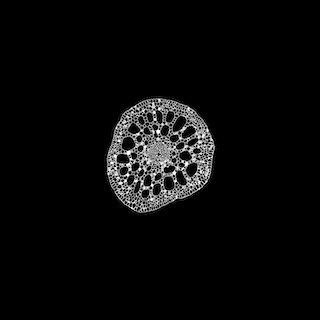
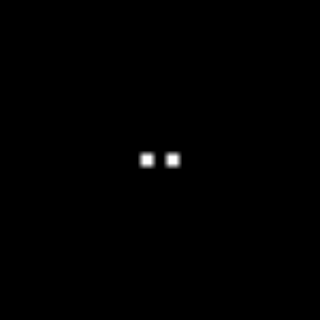
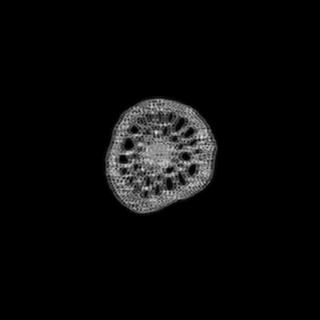
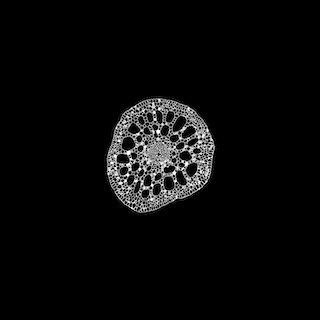
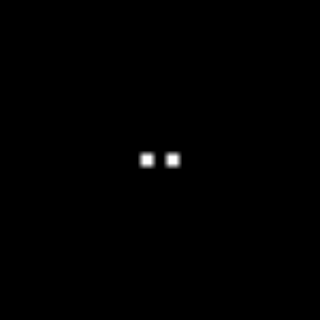
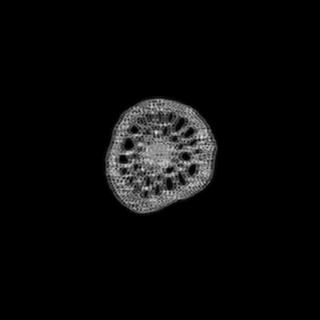
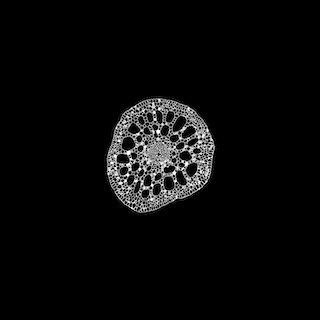
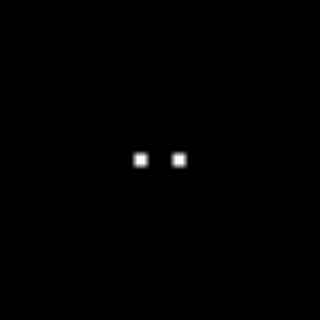
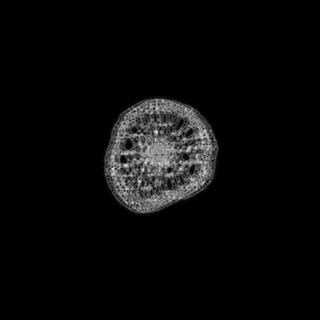
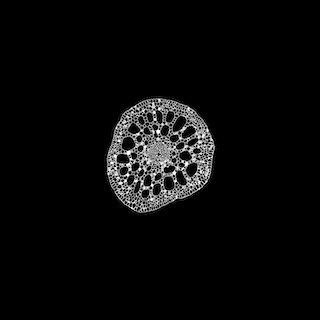
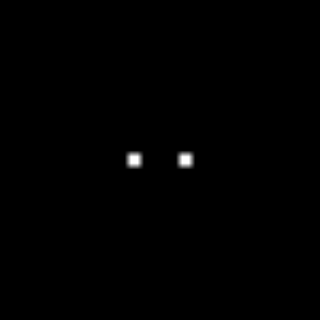
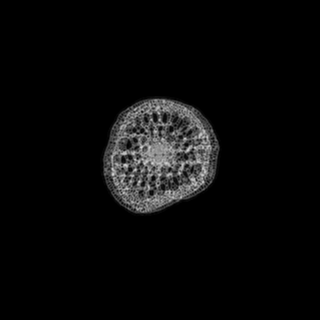
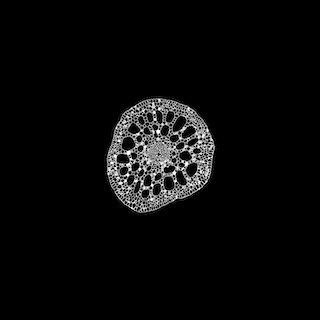
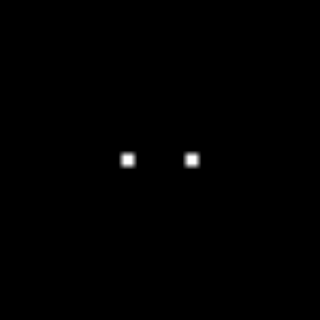
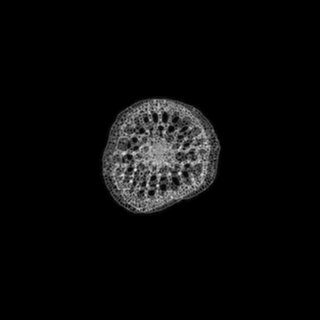
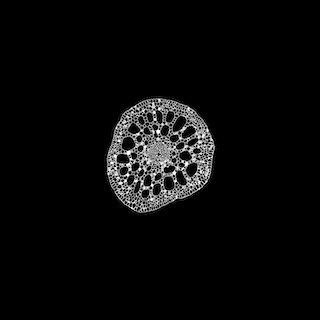
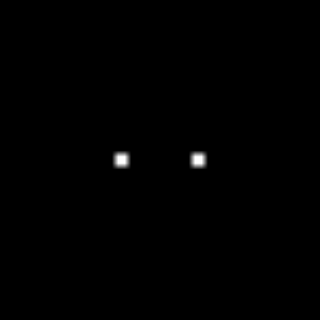
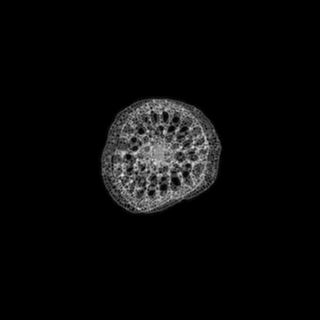
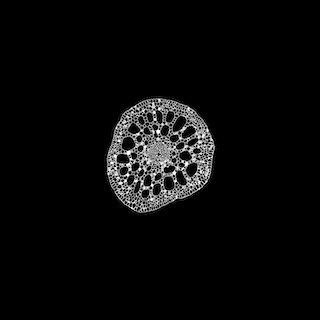
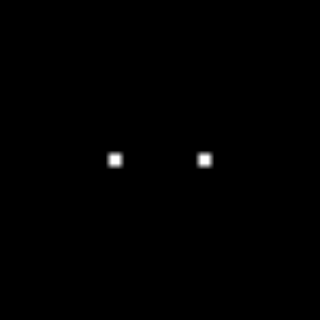
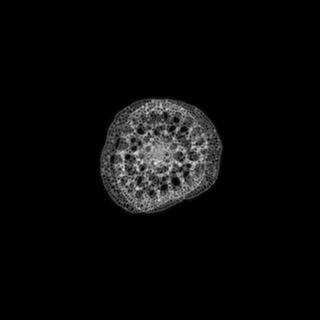
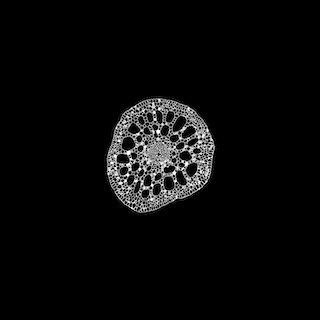
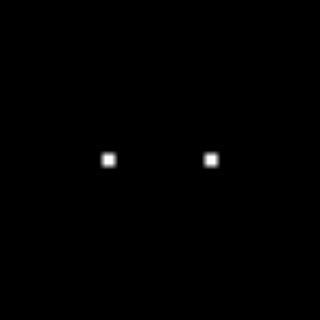
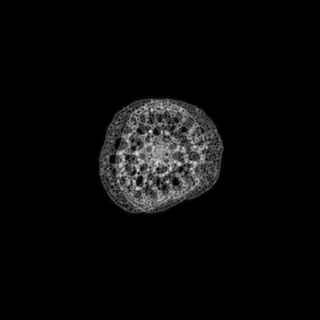
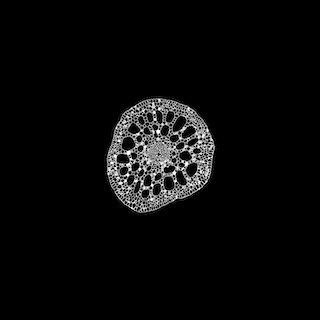
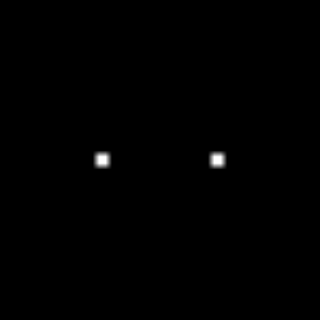
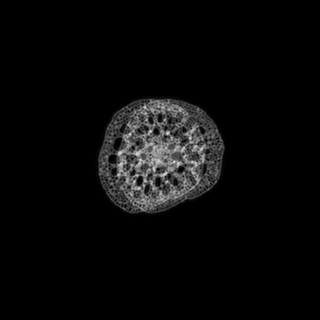
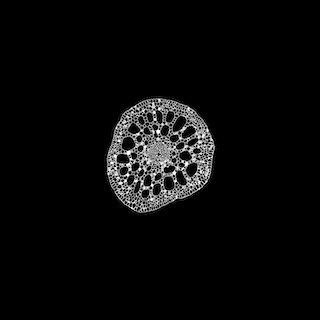
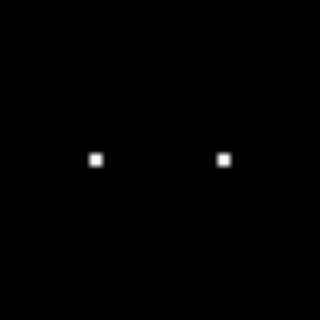
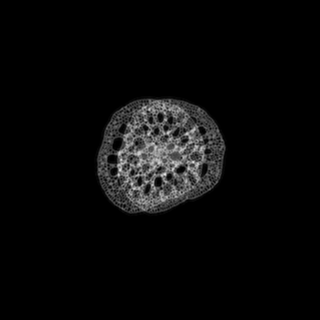
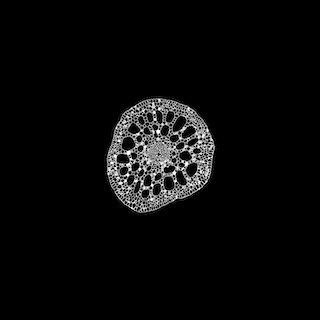
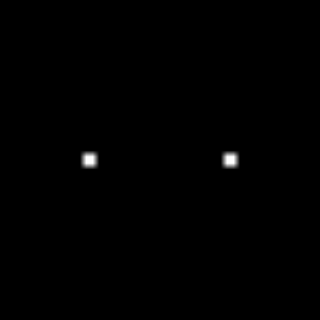
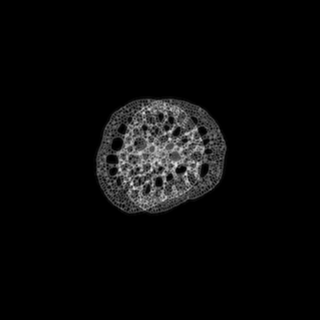

In [ ]:
# make a 4D array (how many frames, 3, height, height, width)
frames = 10
num_cols = 3
height, width = 320, 320
mid = 50//2
mid2 = height//2
w = 10

# make a 2d array to store kernels
data = np.zeros((frames, num_cols, height, width))

for i in range(1, frames+1):
  data[i-1, 0, :, :] = cell

  d_box_filter = np.zeros((50,50))
  d_box_filter[mid-1:mid+1, mid-i-2:mid-i] = 1
  d_box_filter[mid-1:mid+1, mid+i:mid+i+2] = 1

  d_box_filter = d_box_filter/(d_box_filter.sum()) 


  data[i-1, 1, :, :] = cv2.resize(d_box_filter, (cell.shape))*255
  data[i-1, 1, :, :] = 255*data[i-1, 1, :, :]/data[i-1, 1, :, :].max()

  doubleboxresult = signal.convolve2d(cell, d_box_filter, mode='same')

  data[i-1, 2, :, :] = doubleboxresult


fig = px.imshow(data, animation_frame=0, facet_col=1, binary_string=True)
fig.update_xaxes(visible=False)  
fig.update_yaxes(visible=False)
fig.show()

fig.write_html("/content/drive/MyDrive/Colab Notebooks/Image Blending/two squares animation")

Do box + circle + github

Circle


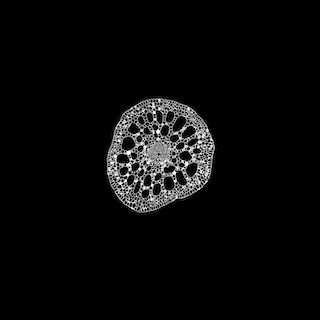
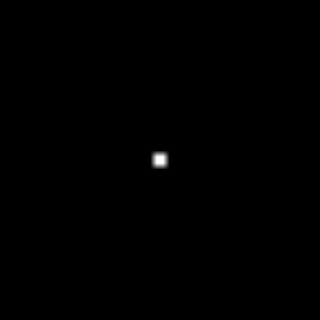
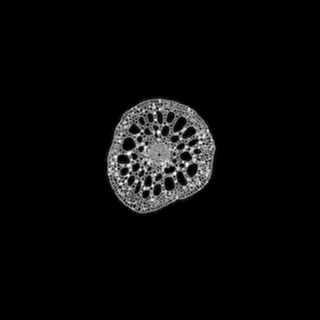
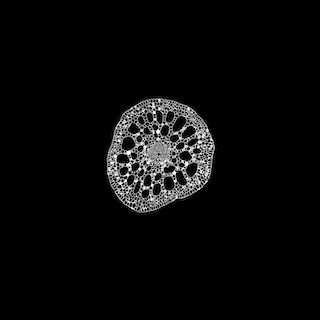
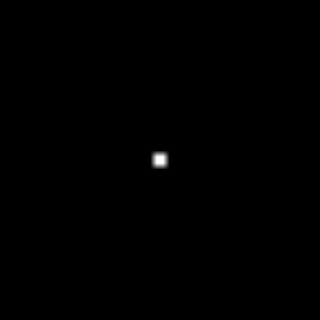
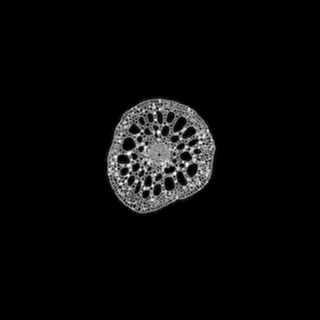
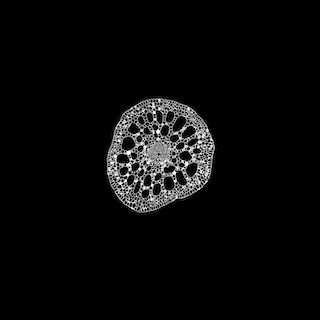
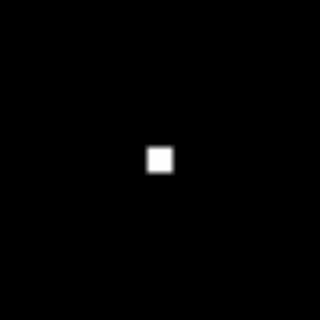
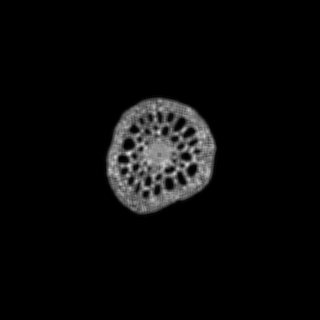
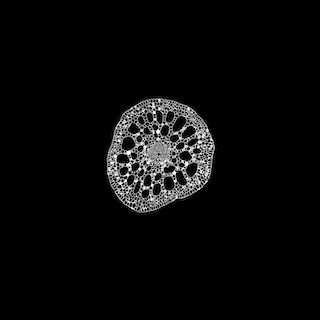
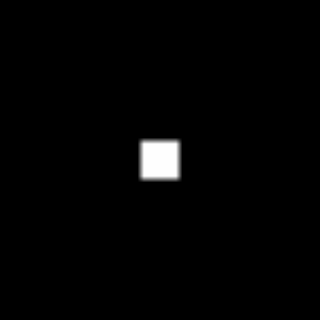
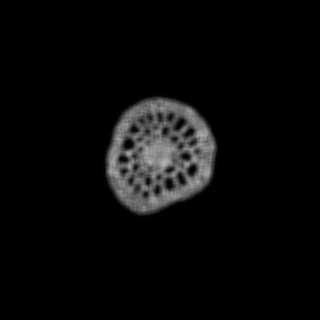
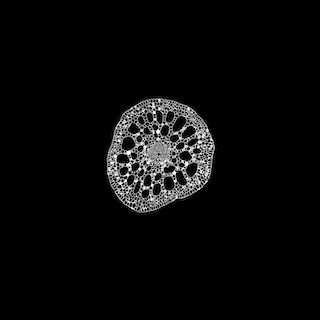
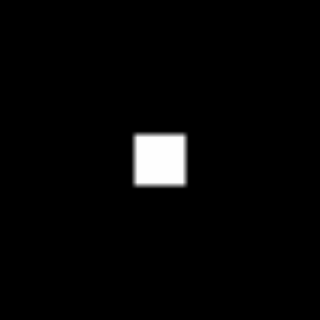
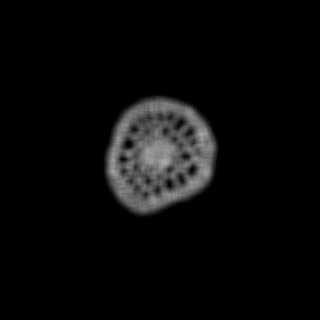
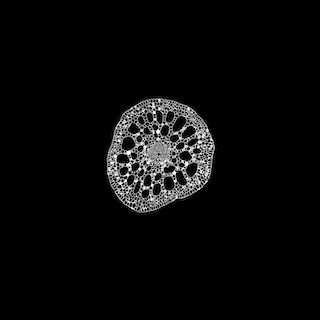
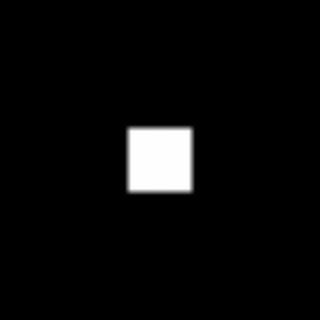
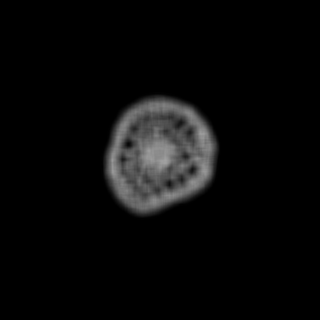
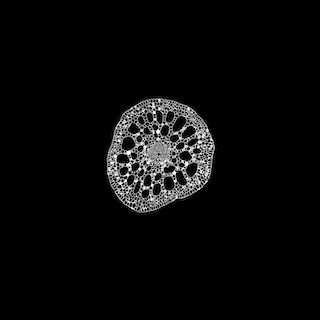
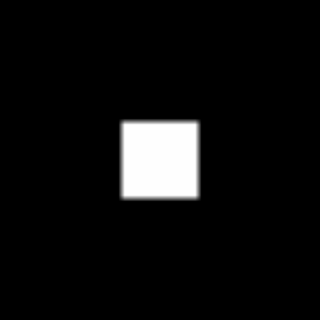
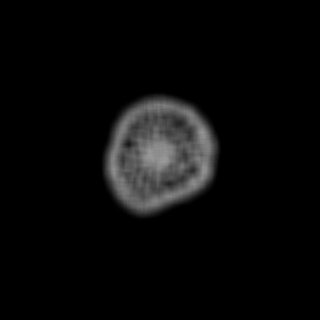
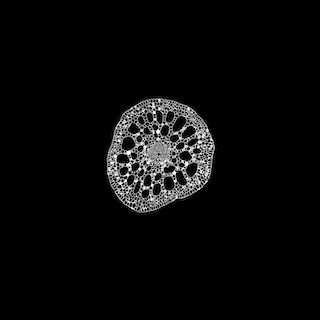
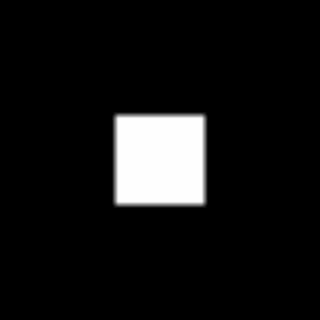
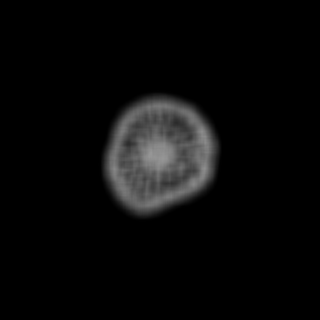
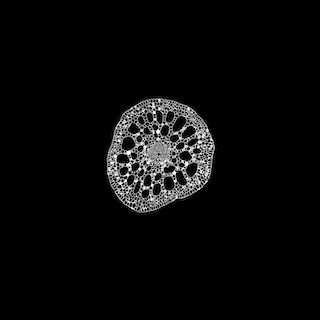
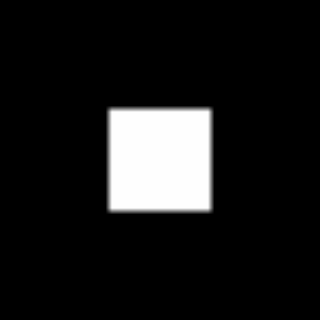
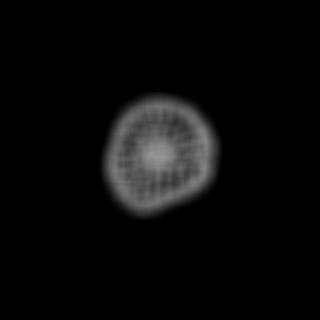
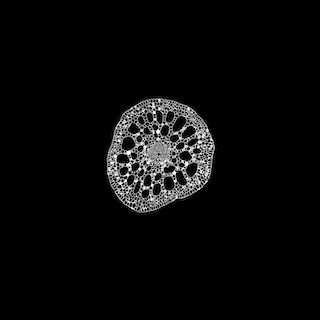
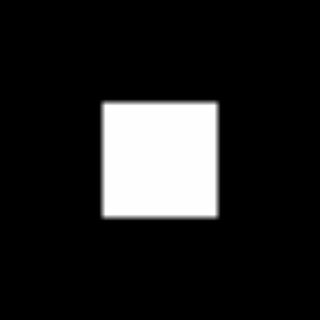
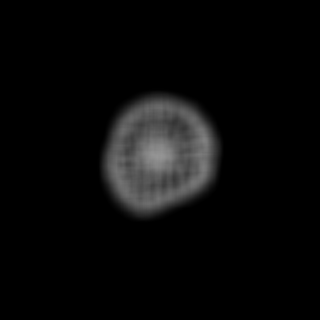
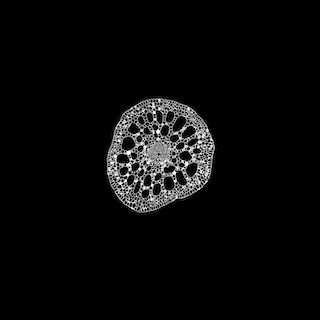
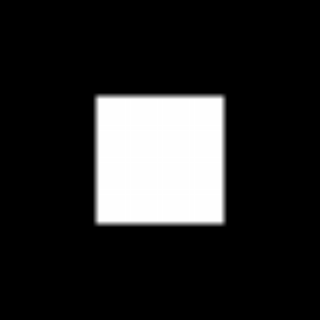
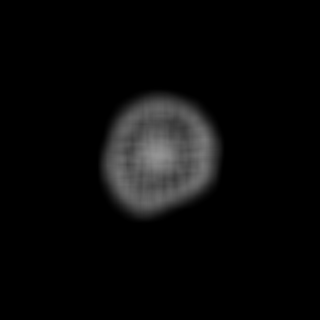

In [ ]:
# make a 4D array (how many frames, 3, height, height, width)
frames2 = 10
num_cols2 = 3
height2, width2 = 320, 320
mid2 = 50//2
w2 = 10

# make a 2d array to store kernels
data2 = np.zeros((frames2, num_cols2, height2, width2))

for w in range(1, frames+1):
  data2[w-1, 0, :, :] = cell

  box_filter = np.zeros((50,50))
  box_filter[mid2-w:mid2+w, mid2-w:mid2+w] = 1

  box_filter = box_filter/(box_filter.sum()) 


  data2[w-1, 1, :, :] = cv2.resize(box_filter, (cell.shape))*255
  data2[w-1, 1, :, :] = 255*data2[w-1, 1, :, :]/data2[w-1, 1, :, :].max()

  doubleboxresult = signal.convolve2d(cell, box_filter, mode='same')

  data2[w-1, 2, :, :] = doubleboxresult


fig = px.imshow(data2, animation_frame=0, facet_col=1, binary_string=True)
fig.update_xaxes(visible=False)  
fig.update_yaxes(visible=False)
fig.show()

fig.write_html("/content/drive/MyDrive/Colab Notebooks/Image Blending/square animation")


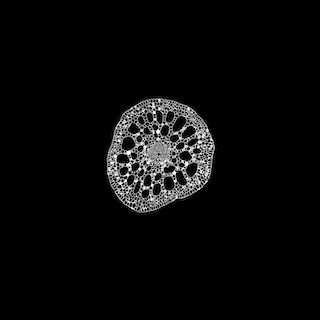
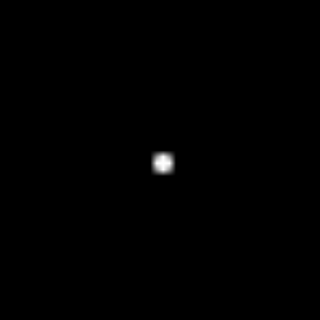
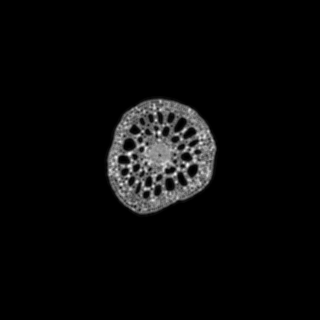
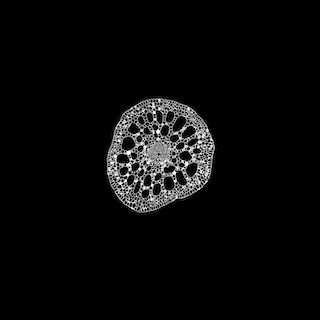
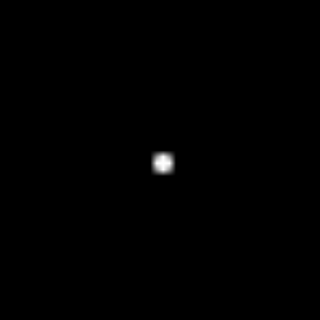
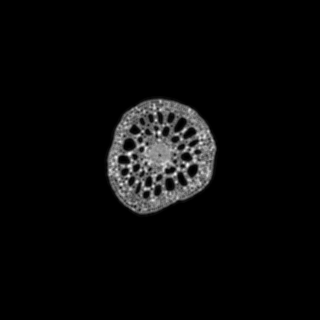
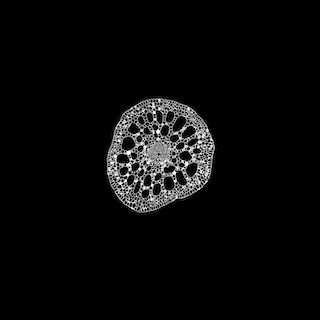
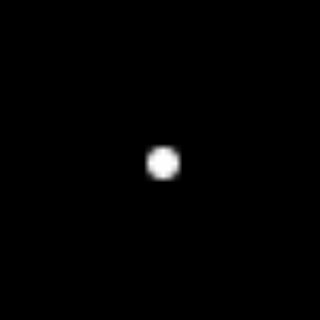
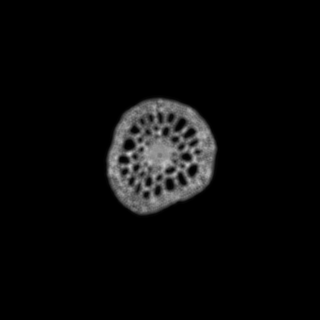
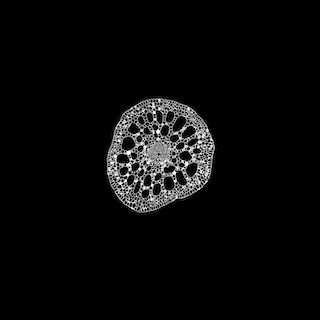
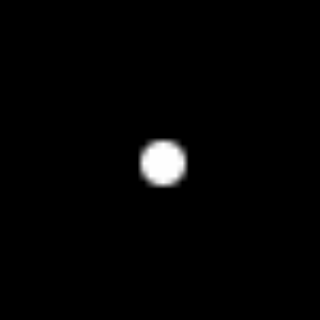
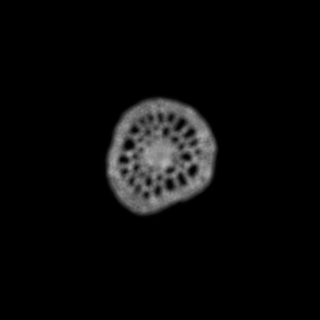
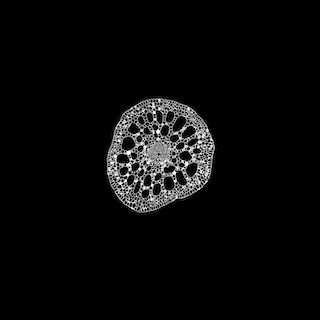
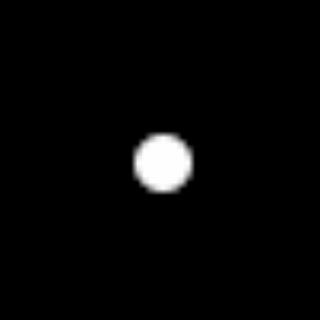
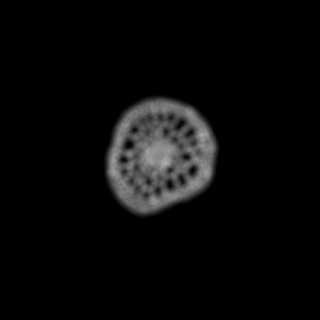
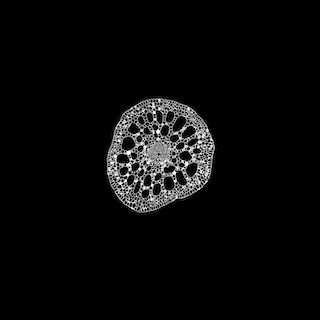
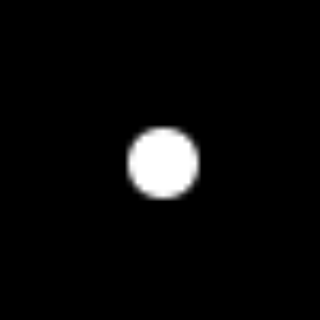
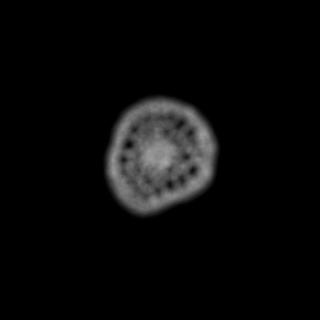
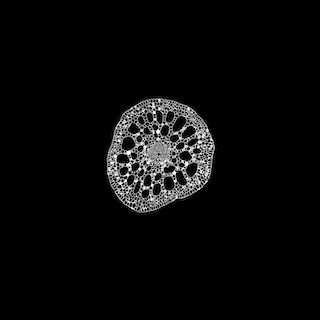
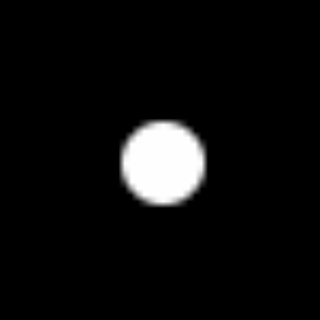
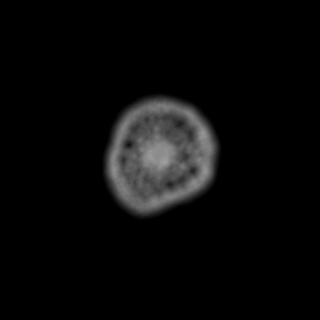
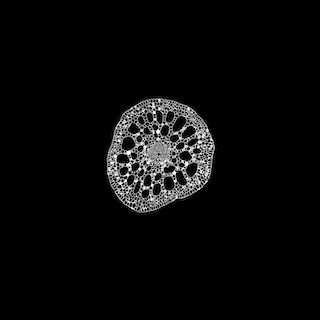
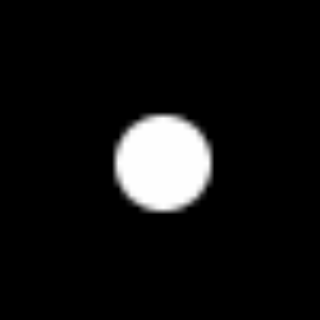
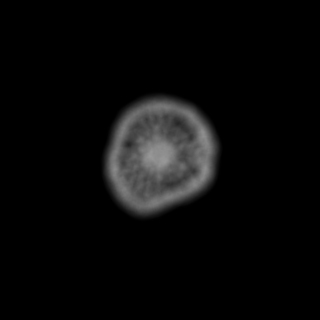
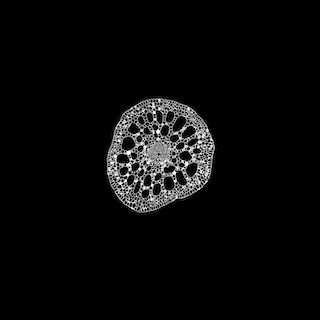
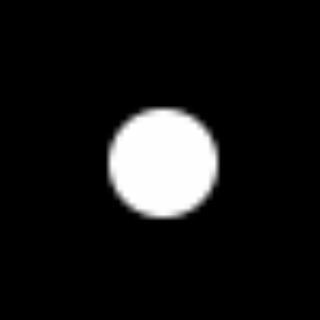
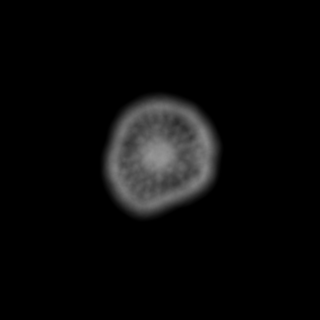
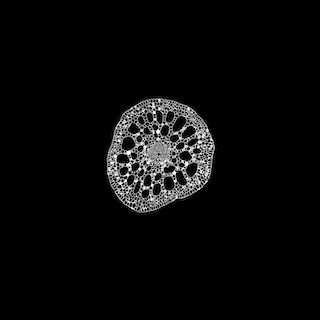
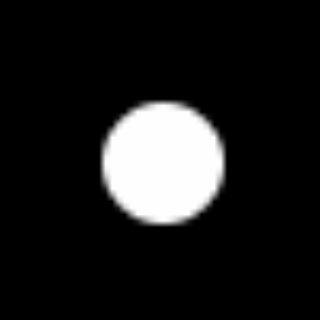
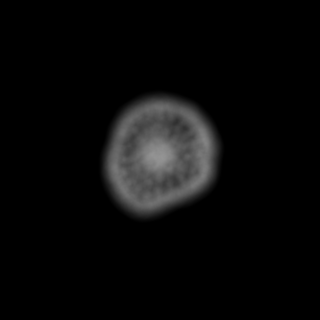
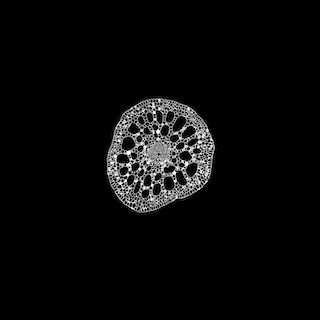
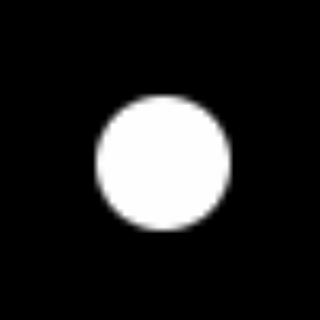
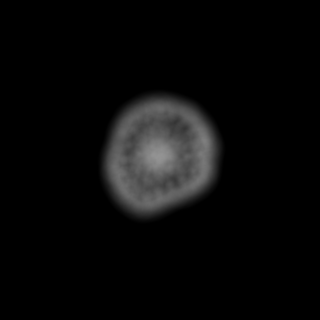

In [ ]:
# make a 4D array (how many frames, 3, height, height, width)
frames3 = 10
num_cols3 = 3
height3, width3 = 320, 320
mid3 = 50//2
w3 = 10

# make a 2d array to store kernels
data3 = np.zeros((frames3, num_cols3, height3, width3))

for v in range(1, frames+1):
  data3[v-1, 0, :, :] = cell


  # Make a circular mask
  cen_x = 0
  cen_y = 0

  x, y = np.ogrid[-25:25, -25:25]
  dist = (np.square(x-cen_y) + np.square(y-cen_x))**0.5 # shape (kernel_size, kernel_size)

  rad = v # radius of circle

  # let's create three kernels for the sake of example
  radii = np.array([rad])#[...,None,None] # shape (num_radii, 1, 1)
  circ_filter = 1 - (dist - radii).clip(0,1) # shape (num_radii, kernel_size, kernel_size)

  circ_filter = circ_filter/circ_filter.sum()



  circ_filter = circ_filter/(circ_filter.sum()) 


  data3[v-1, 1, :, :] = cv2.resize(circ_filter, (cell.shape))*255
  data3[v-1, 1, :, :] = 255*data3[v-1, 1, :, :]/data3[v-1, 1, :, :].max()

  doubleboxresult = signal.convolve2d(cell, circ_filter, mode='same')

  data3[v-1, 2, :, :] = doubleboxresult


fig = px.imshow(data3, animation_frame=0, facet_col=1, binary_string=True)

fig.update_xaxes(visible=False)  
fig.update_yaxes(visible=False)
fig.show()

fig.write_html("/content/drive/MyDrive/Colab Notebooks/Image Blending/circle animation")